In [1]:
import numpy as np
import itertools
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [2]:
# min linear equation
# Constraints: each is a linear inequality (<=)
# Simplex algorithm is used to solve Linear Program Efficiently
# But also the interior point algo can be used (that is used more to solve the Convex Optimisation Problems in general)
result = opt.linprog(
    [50, 80],
    A_ub=[
        [10, 2],
        [-10, -12],
        [2, 0]
    ],
    b_ub=[20, -90, 10]
)

In [3]:
if result.success:
    print(f"X1: {result.x[0]} hours")
    print(f"X2: {result.x[1]} hours")

X1: 0.6 hours
X2: 7.0 hours


In [4]:
# The simplest algorithm for solving LP is to find all extremal points and then
# find the one where the minimised function is minimal 

def get_non_empty_subsets(input_set):
    # Convert the set to a list to be able to use combinations
    s = list(input_set)
    # Generate all subsets
    subsets = []
    for r in range(1, len(s) + 1):  # Start from 1 to exclude the empty set
        subsets.extend(itertools.combinations(s, r))

    # Convert each subset to the desired format
    formatted_subsets = []
    for subset in subsets:
        if len(subset) == 1:
            formatted_subsets.append([subset[0]])  # Flatten single-element tuples
        else:
            formatted_subsets.append(list(subset))  # Keep other subsets as tuples

    return formatted_subsets


# AIx = bI one solution
# Ax >= b satisfied or (<=) depends on the formalism
def linprog(min_f, A_matrix, b_vector):
    """
    This function checks the extremal points and chooses the best
    If there are n variables at least n constraints have to be there too
    """
    visited_vertices = []
    num_of_equations = A_matrix.shape[0]
    i_s = set([i for i in range(num_of_equations)])
    minimal_f_value = float('inf')
    minimal_x = None
    for subset in get_non_empty_subsets(i_s):
        A_loop = A_matrix[subset]
        b_loop = b_vector[subset]
        if A_loop.shape[0] != A_loop.shape[1]:
            continue
        try:
            x_vector = np.linalg.solve(A_loop, b_loop)
        except Exception:
            continue
        print('testing x:', x_vector, 'value of minimised function:', min_f.dot(x_vector))
        if not np.all(A @ x_vector <= b):
            continue
        visited_vertices.append(x_vector)
        if min_f.dot(x_vector) < minimal_f_value:
            minimal_f_value = min_f.dot(x_vector)
            minimal_x = x_vector
    return minimal_x, visited_vertices


In [5]:
f = np.array([50, 80])

A = np.array([
    [10, 2],
    [-10, -12],
    [2, 0]
])

b = np.array([20, -90, 10])

x = linprog(f, A, b)
print('X1:', x[0][0])
print('X2:', x[0][1])

testing x: [0.6 7. ] value of minimised function: 590.0
testing x: [  5. -15.] value of minimised function: -950.0
testing x: [5.         3.33333333] value of minimised function: 516.6666666666666
X1: 0.6000000000000001
X2: 7.0


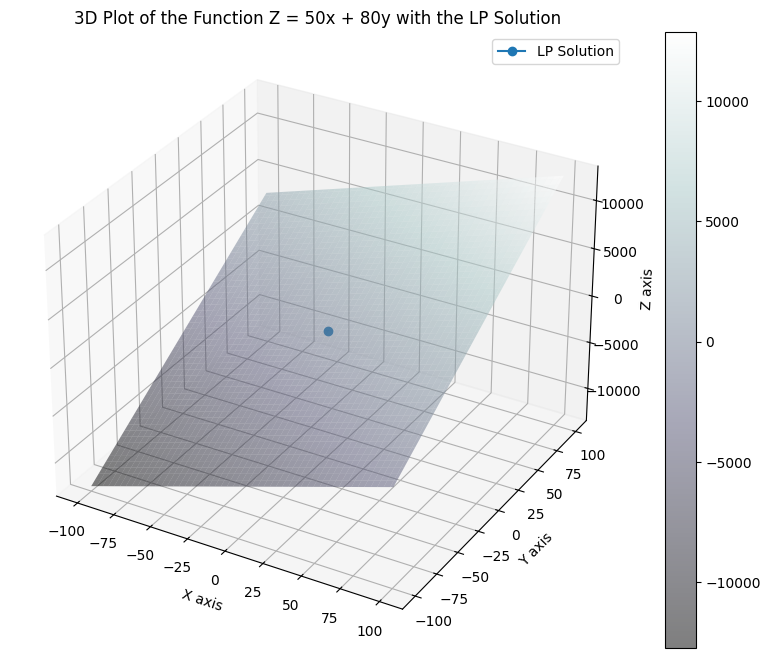

In [6]:
# I would like to plot the polyhedron, visualize the LP
# I would like to visualize some 3d polyhedron with the way algo soled the LP

def function(x, y): return 50 * x + 80 * y


# Create a meshgrid for X and Y
X_ = np.linspace(-100, 100, 100)
Y_ = np.linspace(-100, 100, 100)
X, Y = np.meshgrid(X_, Y_)

# Compute Z
Z = function(X, Y)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the LP Solution
solution = ax.plot(.6, .7, f.dot(np.array([.6, .7])), label='LP Solution', marker='o')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='bone', alpha=0.5)

# Add a color bar
fig.colorbar(surf)

# Set labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Set title
plt.title('3D Plot of the Function Z = 50x + 80y with the LP Solution')
plt.legend()

# Show the plot
plt.show()

In [7]:
# Visualising feasible region of a linear program of x1, x2, x3.
f = np.array([1, 1, 1])

# Updated constraints matrix A
A = np.array([
    [1, 0, 0],
    [-1, 0, 0],
    [0, 1, 0],
    [0, -1, 0],
    [0, 0, 1],
    [0, 0, -1]
])

# Updated constraints bounds
b = np.array([5, 5, 5, 5, 5, 5])  # Updated bounds

x, visited_points = linprog(f, A, b)
print('X1:', x[0])
print('X2:', x[1])
print('X3:', x[2])

testing x: [5. 5. 5.] value of minimised function: 15.0
testing x: [ 5.  5. -5.] value of minimised function: 5.0
testing x: [ 5. -5.  5.] value of minimised function: 5.0
testing x: [ 5. -5. -5.] value of minimised function: -5.0
testing x: [-5.  5.  5.] value of minimised function: 5.0
testing x: [-5.  5. -5.] value of minimised function: -5.0
testing x: [-5. -5.  5.] value of minimised function: -5.0
testing x: [-5. -5. -5.] value of minimised function: -15.0
X1: -5.0
X2: -5.0
X3: -5.0


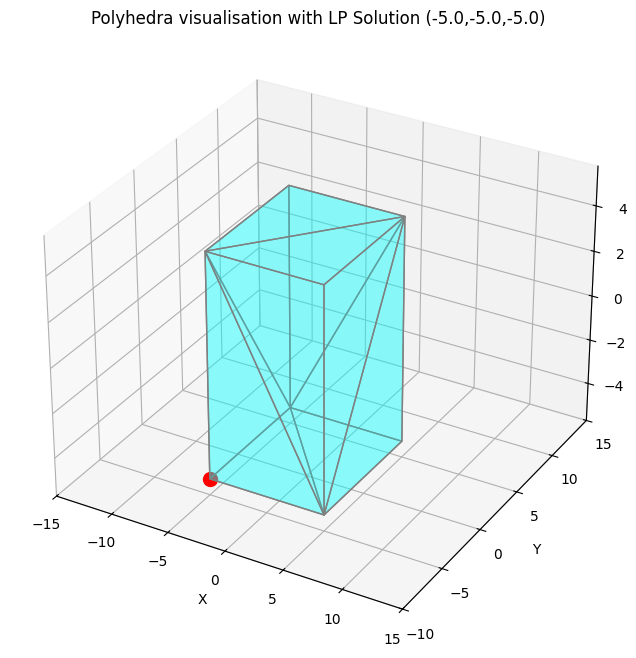

In [8]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import ConvexHull

vertices = []
for point in visited_points:
    vertices.append(list(point))
vertices = np.array(vertices)

# Compute the convex hull of the vertices
hull = ConvexHull(vertices)

# Get the faces of the polyhedron from the convex hull
faces = [vertices[simplex] for simplex in hull.simplices]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Draw the polyhedron
poly3d = Poly3DCollection(faces, facecolors='cyan', linewidths=1, edgecolors='gray', alpha=.25)
ax.add_collection3d(poly3d)

# Plot the solution
ax.scatter(x[0], x[1], x[2], color='r', s=100)

# Set the limits of the axes (optional)
ax.set_xlim(-15, 15)
ax.set_ylim(-10, 15)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title(f'Polyhedra visualisation with LP Solution ({x[0]},{x[1]},{x[2]})')

# Show the plot
plt.show()

In [103]:
# Implementation of the simplex algorithm
# I would also like to add sme visualization of the simplex algorithm with the polyhedron
def simplex(simp_tab, num_of_vars):
    """
    The Implementation of the Simplex algorithm for solving LP.
    The Bland Rule is implemented,
    therefore the 'j' and 'i' is chosen so that it has the lowest index possible.
    The b vector has to have non-negative values.
    
    :param simp_tab: simplex table
    :param num_of_vars: number of variables in the LP
    :return: the solution to the LP Problem
    """
    visited_vertices = []

    def get_result_simplex(simplex_table):
        simplex_table = np.array(simplex_table)
        x_vector = []
        A_matrix = simplex_table[:, :num_of_vars]
        b_vector = simplex_table[:, -1]
        for column in A_matrix.T:
            if np.sum(column) == 1 and np.all((column == 1) | (column == 0)):
                x_vector.append(float(b_vector[np.argmax(column)]))
            else:
                x_vector.append(0.0)
        return x_vector
        

    def iterate_till_solved(simplex_table):
        while True:
            # Iterate to find the optimum if exists
            visited_vertices.append(get_result_simplex(simplex_table[:]))
            chosen_column = None
            for j in reversed(range(len(simplex_table[0]))):
                if simplex_table[0][j] < 0.:
                    chosen_column = j
            if chosen_column is None:
                # No column to choose
                return simplex_table

            lowest_division = float('inf')
            chosen_row = None
            for i in reversed(range(len(simplex_table))):
                if simplex_table[i][chosen_column] <= 0:
                    continue
                div = simplex_table[i][-1] / simplex_table[i][chosen_column]
                if div < lowest_division:
                    lowest_division = div
                    chosen_row = i
            if chosen_row is None:
                # No row to choose
                return simplex_table

            simplex_table[chosen_row] = [e * (1 / simplex_table[chosen_row][chosen_column]) for e in
                                         simplex_table[chosen_row]]

            for i in reversed(range(len(simplex_table))):
                if i != chosen_row:
                    simplex_table[i] = [
                        e[0] - (simplex_table[i][chosen_column] / simplex_table[chosen_row][chosen_column]) * (e[1]) for
                        e in zip(simplex_table[i], simplex_table[chosen_row])]

    result_simplex = iterate_till_solved(simp_tab)
    result_simplex = get_result_simplex(result_simplex)
    return result_simplex, np.array(visited_vertices)

In [104]:
std_sim_tab = [
    [-1, -1, -1, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, -5],
    [-1, 0, 0, 0, 0, 1, 0, 0, 0, 0, -5],
    [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, -5],
    [0, -1, 0, 0, 0, 0, 0, 1, 0, 0, -5],
    [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, -5],
    [0, 0, -1, 0, 0, 0, 0, 0, 0, 1, -5],
]

result, visited_points = simplex(std_sim_tab, num_of_vars=3)
print('result vector:')
print(result)

result vector:
[-5.0, -5.0, -5.0]


In [105]:
for point in visited_points:
    print('pointed visited:', np.array(point))

pointed visited: [0. 0. 0.]
pointed visited: [-5.  0.  0.]
pointed visited: [-5. -5.  0.]
pointed visited: [-5. -5. -5.]


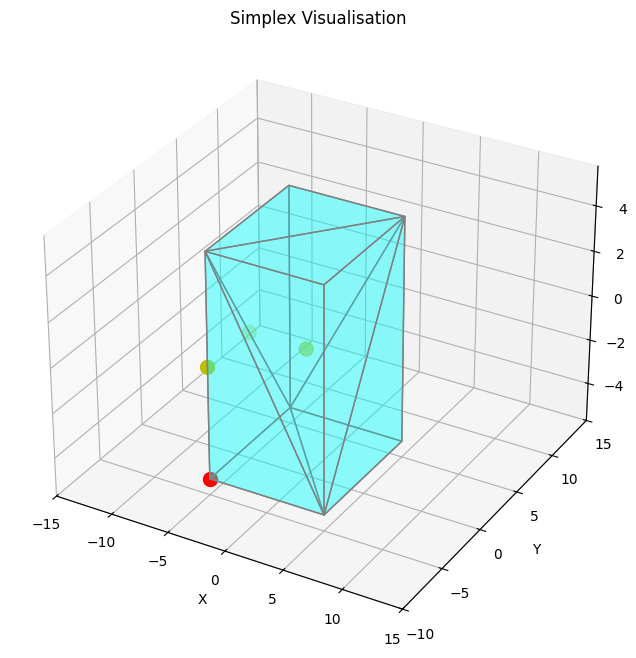

In [106]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Draw the polyhedron
poly3d = Poly3DCollection(faces, facecolors='cyan', linewidths=1, edgecolors='gray', alpha=.25)
ax.add_collection3d(poly3d)

# Plot the simplex path
ax.scatter(visited_points[:-1, 0], visited_points[:-1, 1], visited_points[:-1, 2], color='y', s=100)
ax.scatter(result[0], result[1], result[2], color='r', s=100)

# Set the limits of the axes (optional)
ax.set_xlim(-15, 15)
ax.set_ylim(-10, 15)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('Simplex Visualisation')

# Show the plot
plt.show()